# Capstone Three: 3. Modeling - Unsupervised<a id='3'></a>

### Anomaly Detection using Unsupervised Algorithms

## 3.1 Contents<a id='3.1'></a>
* [3. Modeling - Unsupervised](#3)
  * [3.1 Contents](#3.1)
  * [3.2 Imports](#3.2)
  * [3.3 Load Data and Preprocessing](#3.3)
  * [3.4 Modeling](#3.4)
    * [3.4.1 Isolation Forest](#3.4.1)
    * [3.4.2 Local Outlier Factor](#3.4.2)
  * [3.5 Compare Scores from All Supervised and Unsupervised Models](#3.5)

## 3.2 Imports<a id='3.2'></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#for modeling
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# Metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support

#filter warnings
import warnings
warnings.filterwarnings("ignore")

## 3.3 Load Data and Preprocessing<a id='3.3'></a>

Loading the tarining and testing datasets obtained from the `Modeling - Supervised` notebook, in order to use the exactly same train-test split.

In [2]:
# Read from previous saved train and test data files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

X_train = train.drop(['Class'], axis=1)
y_train = train['Class']
X_test = test.drop(['Class'], axis=1)
y_test = test['Class']

In [3]:
# Standard Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 3.4 Modeling<a id='3.4'></a>

### 3.4.1 Isolation Forest<a id='3.4.1'></a>

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56651
           1       0.04      0.80      0.07        95

    accuracy                           0.96     56746
   macro avg       0.52      0.88      0.53     56746
weighted avg       1.00      0.96      0.98     56746



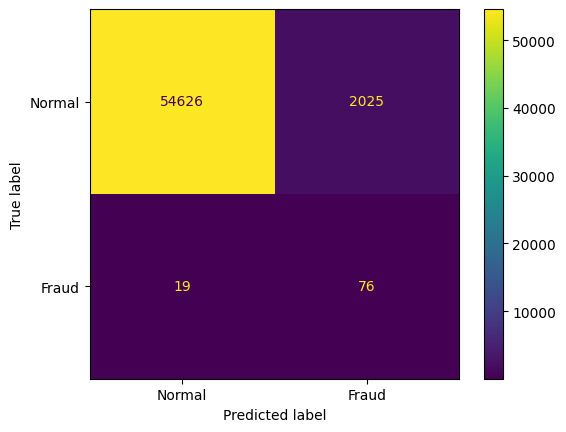

In [4]:
# Model (Using Default 'n_estimators' and 'contamination')
clf = IsolationForest(n_estimators=100, contamination='auto', random_state=0)
clf.fit(X_train)
y_pred = clf.predict(X_test)

# Rename Class labels
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

# Metrics
p, r, f, s = precision_recall_fscore_support(y_test, y_pred)
IF_scores = [round(p[1], 2), round(r[1], 2), round(f[1], 2)]

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Normal', 'Fraud'])
disp.plot()
plt.show()

Result: High Recall but very low Precision.

#### Hyperparameter Tuning of Isolation Forest Model:
`n_estimators` and `contamination`

In [5]:
# Within the training set, do train-test split: "t" denotes trianing set
Xt_train, Xt_test, yt_train, yt_test = train_test_split(X_train, y_train,
                                                    train_size = 0.8,
                                                    random_state = 42,
                                                    stratify=y_train)

**(1) `n_estimators`**

In [6]:
precision_0 = []
precision_1 = []
recall_0 = []
recall_1 = []

ks = [10, 50, 100, 200, 300, 500, 1000, 2000]

for k in ks:

    clf = IsolationForest(n_estimators=k, random_state=0)
    clf.fit(Xt_train)
    yt_pred = clf.predict(Xt_test)

    yt_pred[yt_pred == 1] = 0
    yt_pred[yt_pred == -1] = 1

    p, r, f, s = precision_recall_fscore_support(yt_test, yt_pred)

    precision_0.append(round(p[0], 3))
    precision_1.append(round(p[1], 3))
    recall_0.append(round(r[0], 3))
    recall_1.append(round(r[1], 3))

In [7]:
# Combine all metric to a dataframe
df_matrics = pd.DataFrame()
df_matrics['n_estimators'] = ks
df_matrics['precision_0'] = precision_0
df_matrics['precision_1'] = precision_1
df_matrics['recall_0'] = recall_0
df_matrics['recall_1'] = recall_1

df_matrics

,n_estimators,precision_0,precision_1,recall_0,recall_1
0,10,1.0,0.022,0.934,0.895
1,50,1.0,0.035,0.961,0.855
2,100,1.0,0.036,0.961,0.868
3,200,1.0,0.040,0.965,0.882
4,300,1.0,0.041,0.965,0.882
5,500,1.0,0.043,0.967,0.882
6,1000,1.0,0.044,0.968,0.882
7,2000,1.0,0.044,0.968,0.882


The precision and recall values for each `n_estimators`>=200 are nearly the same. I will choose `n_estimators`=1000 because of its best scores.

**(2) `contamination`: in the range (0, 0.5]**

In [8]:
precision_0 = []
precision_1 = []
recall_0 = []
recall_1 = []

cs = [0.01, 'auto', 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
for c in cs:
    clf = IsolationForest(contamination=c, random_state=0)
    clf.fit(Xt_train)
    yt_pred = clf.predict(Xt_test)

    yt_pred[yt_pred == 1] = 0
    yt_pred[yt_pred == -1] = 1

    p, r, f, s = precision_recall_fscore_support(yt_test, yt_pred)

    precision_0.append(round(p[0], 3))
    precision_1.append(round(p[1], 3))
    recall_0.append(round(r[0], 3))
    recall_1.append(round(r[1], 3))

In [9]:
# Combine all metric to a dataframe
df_matrics = pd.DataFrame()
df_matrics['contamination'] = cs
df_matrics['precision_0'] = precision_0
df_matrics['precision_1'] = precision_1
df_matrics['recall_0'] = recall_0
df_matrics['recall_1'] = recall_1

df_matrics

,contamination,precision_0,precision_1,recall_0,recall_1
0,0.01,0.999,0.112,0.991,0.671
1,auto,1.000,0.036,0.961,0.868
2,0.05,1.000,0.030,0.952,0.882
3,0.1,1.000,0.015,0.902,0.908
4,0.2,1.000,0.008,0.804,0.921
5,0.3,1.000,0.005,0.702,0.934
6,0.4,1.000,0.004,0.604,0.947
7,0.5,1.000,0.003,0.502,0.947


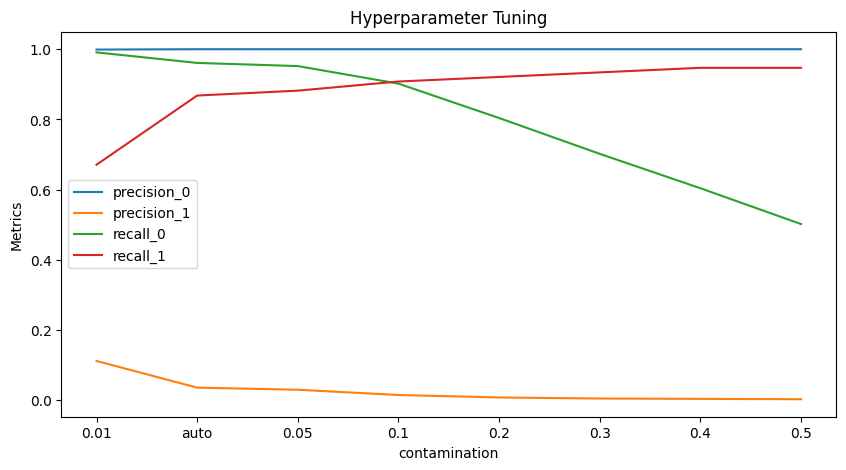

In [10]:
# Plot the metrics
# df_plt = df_matrics.drop(index=1).reset_index(drop=True)
df_matrics.plot(x='contamination', y=['precision_0', 'precision_1', 'recall_0', 'recall_1'], figsize=(10,5))

# Set the x-axis label
plt.xlabel('contamination')

# Set the y-axis label
plt.ylabel('Metrics')

# Set the title of the plot
plt.title('Hyperparameter Tuning')

# Display the plot
plt.show()

**Precision for Lable 0 (Normal):** Always equals 1.

**Precision for Lable 1 (Fraud):** Very small, approaching 0 as `contamination` increases.

**Recall for Lable 0 (Normal):** Decreases with `contamination`. For contamination < 0.1, recall_0 > 0.9.

**Recall for Lable 1 (Fraud):** Increases with `contamination`. For contamination = 'auto' or >= 0.05, recall_1 > 0.85.

The default `contamination`='auto' gives relatively better results with high recall_1 and recall_0. Thus, we choose "contamination" = 'auto'.

#### Re-run the model with chosen hyperparameters:
`n_estimators`=1000, `contamination` = 'auto'

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56651
           1       0.04      0.80      0.07        95

    accuracy                           0.97     56746
   macro avg       0.52      0.88      0.53     56746
weighted avg       1.00      0.97      0.98     56746



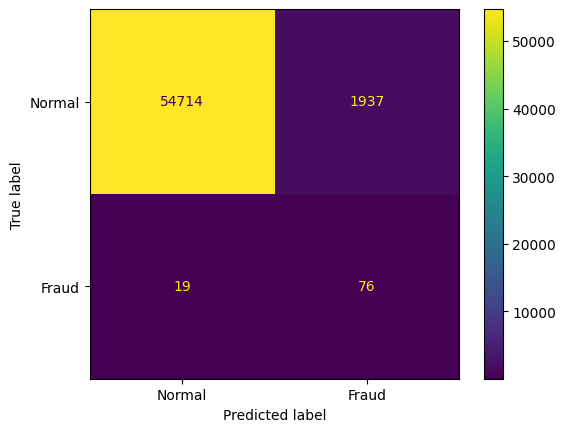

In [11]:
clf = IsolationForest(n_estimators=1000, contamination='auto', random_state=0)
clf.fit(X_train)
y_pred = clf.predict(X_test)

# Rename Class labels
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

# Metrics
p, r, f, s = precision_recall_fscore_support(y_test, y_pred)
IF_scores = [round(p[1], 2), round(r[1], 2), round(f[1], 2)]

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Normal', 'Fraud'])
disp.plot()
plt.show()

The number of False Positives decreased slightly (from 2025 to 1937), but the skill scores remained the same.

### 3.4.2 Local Outlier Factor<a id='3.4.2'></a>

**Note** that if I want to use `sklearn.neighbors.LocalOutlierFactor` to fit on the training set and then predict on the testing set, I need to set `novelty` to `True`, which is called `Novelty Detection`. The result of clf.fit(X) then clf.predict(X) with novelty=True may differ from the result obtained by clf.fit_predict(X) with novelty=False.

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56651
           1       0.03      0.84      0.05        95

    accuracy                           0.95     56746
   macro avg       0.51      0.89      0.51     56746
weighted avg       1.00      0.95      0.97     56746



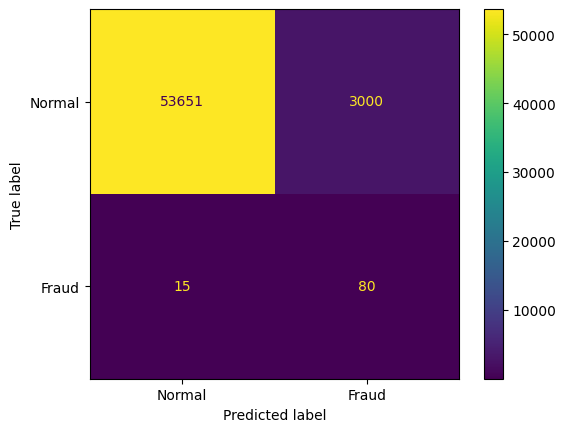

In [12]:
# Model
clf = LocalOutlierFactor(n_neighbors=1000, novelty=True)
clf.fit(X_train)
y_pred = clf.predict(X_test)

# Rename Class labels
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

# Metrics
p, r, f, s = precision_recall_fscore_support(y_test, y_pred)
LOF_scores = [round(p[1], 2), round(r[1], 2), round(f[1], 2)]

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Normal', 'Fraud'])
disp.plot()
plt.show()

The LOF result is similar to that of the Isolation Forest: a very high Recall (0.84) and a very low Precision (0.03).

I also tried tuning the LOF model with different `n_neighbors` (from 100 to 1000). As "n_neighbors" increases, the results get better (higher recall), although the precision is still very low.

Due to limited computing resources, I cannot adjust with larger n_neighbors, and continuing to increase "n_neighbors" cannot improve Recall much, so I choose n_neighbors=1000 for the LOF model.

## 3.5 Compare Scores from All Supervised and Unsupervised Models<a id='3.5'></a>

In [13]:
df_scores = pd.read_csv("scores_supervised.csv", index_col=0)

df_scores.loc[len(df_scores),:] = IF_scores
df_scores = df_scores.rename(index={6: 'Isolation Forest'})

df_scores.loc[len(df_scores),:] = LOF_scores
df_scores = df_scores.rename(index={7: 'Local Outlier Factor'})

df_scores

,Precision,Recall,F1 Score
Logistic Regression,0.85,0.58,0.69
LR w/ Resampling,0.06,0.87,0.11
XGBoost,0.97,0.76,0.85
XGB w/ Resampling,0.96,0.77,0.85
LightGBM,0.71,0.46,0.56
LGBM w/ Resampling,0.94,0.76,0.84
Isolation Forest,0.04,0.80,0.07
Local Outlier Factor,0.03,0.84,0.05


#### Conclusion:
Considering the combination of Recall and Precision and computational efficiency, `XGBoost` is the **best model**. No resampling is needed, it has the highest F1 Score and Precision, and the computing speed is fast. \
`LGBM w/ Resampling` has similar scores but is considerably slower to compute.

If only Recall is considered (i.e. focusing on not treating "Fraud" as normal transactions), the `Logistic Regression w/ Resampling` and two unsupervised models (`Isolation Forest` and `LOF`) have high Recall.